# Classification of irises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd 
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
%matplotlib inline

<hr>

**[Problem 1] Select features and categories for practice**

<hr>

virgicolor and virginica
 
sepal_length and petal_length



In [2]:
d = load_iris()

x = pd.DataFrame(data = d['data'],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y = pd.DataFrame(data = d['target'],columns=['Species'])

df = pd.concat([x, y], axis=1)

df = df[(df["Species"] == 1) | (df["Species"] == 2)].loc[: , ["sepal_length" , "petal_length" , "Species"]]

print("shape of df {}".format(df.shape))

display(df)
 

shape of df (100, 3)


,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  100 non-null    float64
 1   petal_length  100 non-null    float64
 2   Species       100 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 2.7 KB


In [4]:
df.isnull().any()

sepal_length    False
petal_length    False
Species         False
dtype: bool

    There are no null value so we dont need to process this extract value

In [5]:
df.describe()

,sepal_length,petal_length,Species
count,100.000000,100.000000,100.000000
mean,6.262000,4.906000,1.500000
std,0.662834,0.825578,0.502519
min,4.900000,3.000000,1.000000
25%,5.800000,4.375000,1.000000
50%,6.300000,4.900000,1.500000
75%,6.700000,5.525000,2.000000
max,7.900000,6.900000,2.000000


<hr>

**[Problem 2] Data analysis**

<hr>

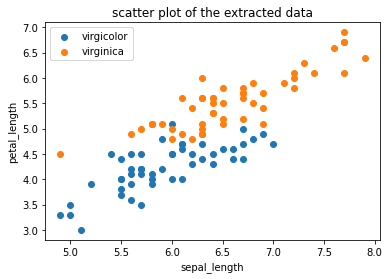

In [6]:
plt.scatter(df["sepal_length"][df["Species"] == 1].values, df["petal_length"][df["Species"] == 1].values , label = "virgicolor")
plt.scatter(df["sepal_length"][df["Species"] == 2].values, df["petal_length"][df["Species"] == 2].values , label = "virginica")
plt.title("scatter plot of the extracted data")
plt.xlabel("sepal_length")
plt.ylabel("petal_length")
plt.legend()
plt.show()

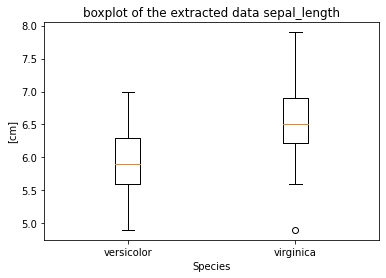

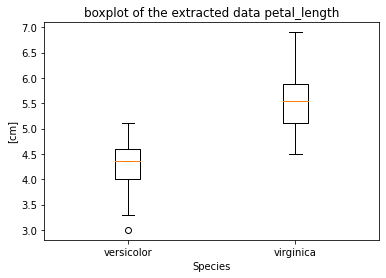

In [7]:
f_names = ["sepal_length" , "petal_length"]
for f_name in f_names:
    plt.boxplot([df[df["Species"]==1][f_name],
                          df[df["Species"]==2][f_name]])
    plt.xticks([1,2] , d.target_names[1:])
    plt.title("boxplot of the extracted data {}".format(f_name))
    plt.xlabel("Species")
    plt.ylabel("[cm]")
    plt.show()

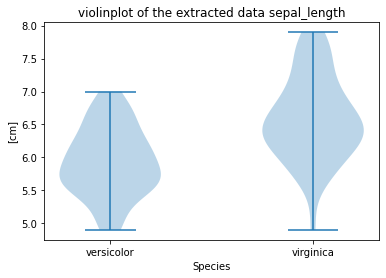

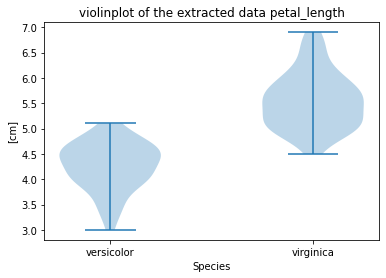

In [8]:
for f_name in f_names:
    plt.violinplot([df[df["Species"]==1][f_name],
                             df[df["Species"]==2][f_name]])
    plt.xticks([1,2] , d.target_names[1:])
    plt.title("violinplot of the extracted data {}".format(f_name))
    plt.xlabel("Species")
    plt.ylabel("[cm]")
    plt.show()

<hr>

**[Problem 3] Division of preprocessing/training data and verification data**

<hr>

In [9]:
X = df.iloc[: , [0,1]].values
y = df.iloc[: , 2].values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25, random_state=42)

print("X train \n\n{}\n{}\n\n".format(X_train.shape,X_train))

print("y train \n\n{}\n{}\n\n".format(y_train.shape,y_train))

print("X test \n\n{}\n{}\n\n".format(X_test.shape,X_test))

print("y test \n\n{}\n{}\n\n".format(y_test.shape,y_test))

X train 

(75, 2)
[[6.7 4.4]
 [5.5 4.4]
 [6.3 5. ]
 [5.2 3.9]
 [7.7 6.7]
 [5.9 4.2]
 [6.2 4.3]
 [7.7 6.1]
 [6.  4.5]
 [6.8 5.9]
 [5.7 4.5]
 [6.5 5.5]
 [6.4 5.3]
 [6.  4.5]
 [5.6 4.5]
 [5.7 4.1]
 [5.4 4.5]
 [4.9 3.3]
 [6.7 5.2]
 [6.7 5. ]
 [5.6 3.9]
 [7.9 6.4]
 [6.6 4.4]
 [6.8 5.5]
 [6.1 4.7]
 [6.4 4.3]
 [5.5 4. ]
 [5.8 4.1]
 [5.6 4.1]
 [6.6 4.6]
 [6.4 5.6]
 [6.3 4.7]
 [5.8 5.1]
 [6.7 4.7]
 [6.9 5.4]
 [4.9 4.5]
 [5.9 5.1]
 [6.5 5.8]
 [5.  3.3]
 [6.3 6. ]
 [7.7 6.7]
 [5.7 4.2]
 [7.7 6.9]
 [6.4 5.3]
 [6.5 5.2]
 [7.2 5.8]
 [6.1 4.6]
 [6.7 5.8]
 [5.1 3. ]
 [6.2 5.4]
 [7.3 6.3]
 [7.2 6. ]
 [5.8 3.9]
 [6.7 5.7]
 [7.2 6.1]
 [5.7 5. ]
 [6.1 5.6]
 [6.3 4.4]
 [5.7 3.5]
 [6.4 4.5]
 [7.1 5.9]
 [6.1 4. ]
 [6.9 4.9]
 [6.1 4.7]
 [6.4 5.5]
 [6.9 5.1]
 [6.7 5.7]
 [6.3 5.6]
 [6.4 5.6]
 [5.9 4.8]
 [6.5 5.1]
 [5.6 4.9]
 [5.6 3.6]
 [5.8 5.1]
 [5.8 5.1]]


y train 

(75,)
[1 1 2 1 2 1 1 2 1 2 1 2 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 2 1 2 1 2 2 2
 2 1 2 2 1 2 2 2 2 1 2 1 2 2 2 1 2 2 2 2 1 1 1 2 1 1 1 2 2 2 2 

<hr>

**[Problem 4] Pretreatment/Standardization**

<hr>

In [10]:
from sklearn.preprocessing import StandardScaler

X_train_trans = StandardScaler().fit_transform(X_train)

X_test_trans = StandardScaler().fit_transform(X_test)

print("X train after StandardScaler Transform \n{}\n\n".format(X_train_trans))

print("X test after StandardScaler Transform \n{}\n\n".format(X_test_trans))

X train after StandardScaler Transform 
[[ 0.62124015 -0.65893772]
 [-1.15373171 -0.65893772]
 [ 0.02958286  0.05557306]
 [-1.59747467 -1.25436337]
 [ 2.10038336  2.08002027]
 [-0.56207442 -0.89710798]
 [-0.11833146 -0.77802285]
 [ 2.10038336  1.36550949]
 [-0.4141601  -0.53985259]
 [ 0.76915447  1.12733923]
 [-0.85790306 -0.53985259]
 [ 0.32541151  0.65099871]
 [ 0.17749719  0.41282845]
 [-0.4141601  -0.53985259]
 [-1.00581738 -0.53985259]
 [-0.85790306 -1.01619311]
 [-1.30164603 -0.53985259]
 [-2.04121763 -1.96887414]
 [ 0.62124015  0.29374332]
 [ 0.62124015  0.05557306]
 [-1.00581738 -1.25436337]
 [ 2.396212    1.72276488]
 [ 0.47332583 -0.65893772]
 [ 0.76915447  0.65099871]
 [-0.26624578 -0.30168233]
 [ 0.17749719 -0.77802285]
 [-1.15373171 -1.13527824]
 [-0.70998874 -1.01619311]
 [-1.00581738 -1.01619311]
 [ 0.47332583 -0.42076746]
 [ 0.17749719  0.77008384]
 [ 0.02958286 -0.30168233]
 [-0.70998874  0.17465819]
 [ 0.62124015 -0.30168233]
 [ 0.91706879  0.53191358]
 [-2.04121763 -

<hr>

**[Problem 5] Learning and estimation**

<hr>

In [11]:
from sklearn.neighbors import KNeighborsClassifier

knn_1 = KNeighborsClassifier(n_neighbors=1)
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_1.fit(X_train_trans , y_train)
knn_3.fit(X_train_trans , y_train)
knn_5.fit(X_train_trans , y_train)
y_pred_1 = knn_1.predict(X_test_trans)
y_pred_3 = knn_3.predict(X_test_trans)
y_pred_5 = knn_5.predict(X_test_trans)

print("1-nn {}".format(y_pred_1))
print("3-nn {}".format(y_pred_3))
print("5-nn {}".format(y_pred_5))

1-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 2 1 1 2]
3-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 1 1 2]
5-nn [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 2]


<hr>

**[Problem 6] Evaluation**

<hr>

## Explanations

**Accuracy**: Accuracy is most intuitive efficiency metric is accuracy, which is essentially the number of correctly expected observations to all observations.

**Precision**: Precision is ratio of correctly predicted positive observations to overall predicted positive observations is known as precision.

**Recall**: Recall is the proportion of correctly estimated positive observations to the total number of observations in a class.

**F1 score**: The weighted average of Precision and Recall is the F1 Score. As a result, this score considers both false positives and false negatives.


In [12]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions = [y_pred_3, y_pred_5, y_pred_1]
keys = ["3-nn","5-nn","1-nn"]

for i,prediction in enumerate(predictions,0):
    print("--------------------------------------------------------")
    print("predictions of {}".format(keys[i]))
    print("--------------------------------------------------------")
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction))
    print("precision =", precision_score(y_true=y_test, y_pred=prediction,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=prediction,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=prediction,average=None)) 
    print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction))) 
    print("\n")



--------------------------------------------------------
predictions of 3-nn
--------------------------------------------------------
accuracy = 0.88
precision = [0.92307692 0.83333333]
recall = [0.85714286 0.90909091]
f1 score = [0.88888889 0.86956522]
confusion matrix =
[[12  2]
 [ 1 10]]


--------------------------------------------------------
predictions of 5-nn
--------------------------------------------------------
accuracy = 0.84
precision = [0.91666667 0.76923077]
recall = [0.78571429 0.90909091]
f1 score = [0.84615385 0.83333333]
confusion matrix =
[[11  3]
 [ 1 10]]


--------------------------------------------------------
predictions of 1-nn
--------------------------------------------------------
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]




<hr>

**[Problem 7] Visualization**

<hr>

In [13]:
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    """
    Draw the determination area of the model that learned binary classification with two-dimensional features.
    The background color is drawn from the estimated values of the trained model.
    The points on the scatter plot are training or validation data.
    Parameters
    ----------------
    X : ndarray, shape(n_samples, 2)
        Feature value
    y : ndarray, shape(n_samples,)
        label
    model : object
        Insert the installed model of the learned model
    step : float, (default : 0.1)
        Set the interval to calculate the estimate
    title : str
        Give the text of the graph Title
    xlabel, ylabel : str
        Give the text of the axis label
    target_names= : list of str
        Give a list of legends
    """
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

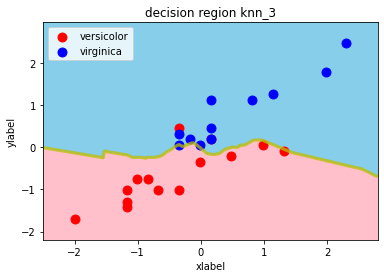

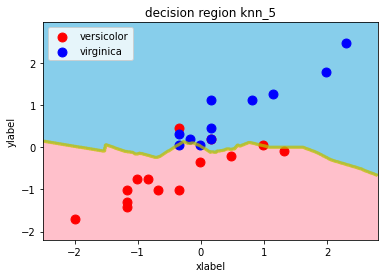

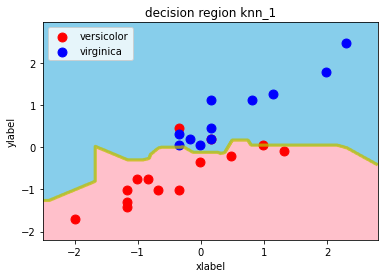

In [14]:

models = [knn_3, knn_5, knn_1]
models_name = ['knn_3', 'knn_5', 'knn_1']
for i,model in enumerate(models):
    decision_region(X_test_trans, y_test, model, title='decision region {}'.format(models_name[i]))


<hr>

**[Problem 8] Learning by other methods**

<hr>

## Logistic regression



In [15]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train_trans, y_train)

prediction_lr = lr.predict(X_test_trans)

print("--------------------------------------------------------")
print("predictions of LogisticRegression")
print("--------------------------------------------------------")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_lr))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_lr ,average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_lr ,average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_lr ,average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_lr))) 
print("--------------------------------------------------------")


--------------------------------------------------------
predictions of LogisticRegression
--------------------------------------------------------
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]
--------------------------------------------------------


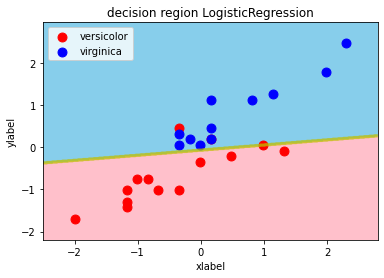

In [16]:
decision_region(X_test_trans, y_test, lr,title='decision region LogisticRegression')

## SVM

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_trans, y_train)

prediction_svc = clf.predict(X_test_trans)

print("--------------------------------------------------------")
print("predictions of SVC")
print("--------------------------------------------------------")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_svc))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_svc ,average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_svc ,average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_svc ,average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_svc))) 
print("--------------------------------------------------------")




--------------------------------------------------------
predictions of SVC
--------------------------------------------------------
accuracy = 0.88
precision = [1.         0.78571429]
recall = [0.78571429 1.        ]
f1 score = [0.88 0.88]
confusion matrix =
[[11  3]
 [ 0 11]]
--------------------------------------------------------


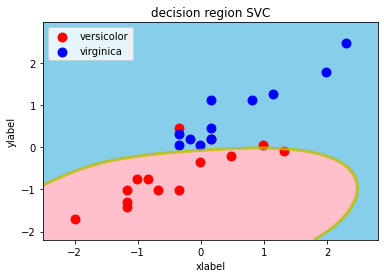

In [18]:
decision_region(X_test_trans, y_test, clf ,title='decision region SVC')

## Decision tree

In [19]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0).fit(X_train_trans, y_train)

prediction_dtc = dtc.predict(X_test_trans)

print("--------------------------------------------------------")
print("predictions of Decision tree")
print("--------------------------------------------------------")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_dtc))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_dtc ,average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_dtc,average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_dtc ,average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_dtc))) 
print("--------------------------------------------------------")

--------------------------------------------------------
predictions of Decision tree
--------------------------------------------------------
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]
--------------------------------------------------------


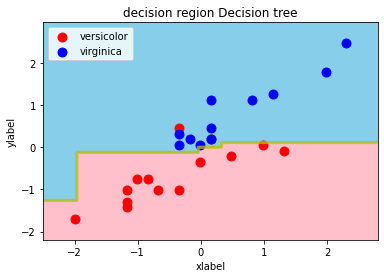

In [20]:
decision_region(X_test_trans, y_test, dtc ,title='decision region Decision tree')

## Random forest

In [21]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier().fit(X_train_trans, y_train)

prediction_rfc = rfc.predict(X_test_trans)

print("--------------------------------------------------------")
print("predictions of Random forest")
print("--------------------------------------------------------")
print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction_rfc))
print("precision =", precision_score(y_true=y_test, y_pred=prediction_rfc ,average=None))    
print("recall =", recall_score(y_true=y_test, y_pred=prediction_rfc,average=None))  
print("f1 score =", f1_score(y_true=y_test, y_pred=prediction_rfc ,average=None)) 
print("confusion matrix =\n{}".format(confusion_matrix(y_true=y_test, y_pred=prediction_rfc))) 
print("--------------------------------------------------------")

--------------------------------------------------------
predictions of Random forest
--------------------------------------------------------
accuracy = 0.92
precision = [1.         0.84615385]
recall = [0.85714286 1.        ]
f1 score = [0.92307692 0.91666667]
confusion matrix =
[[12  2]
 [ 0 11]]
--------------------------------------------------------


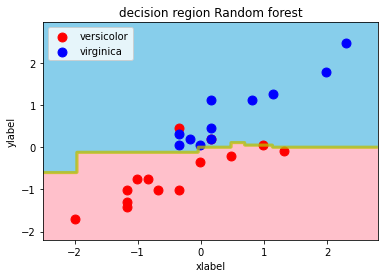

In [22]:
decision_region(X_test_trans, y_test, rfc,title='decision region Random forest')

In [23]:
list_accuracy = [accuracy_score(y_test , y_pred_5) ,accuracy_score(y_test , prediction_lr) , accuracy_score(y_test , prediction_svc) , accuracy_score(y_test , prediction_dtc) ,accuracy_score(y_test , prediction_rfc)]

list_precision = [precision_score(y_test, y_pred_5), precision_score(y_test, prediction_lr), precision_score(y_test, prediction_svc), precision_score(y_test,  prediction_dtc), precision_score(y_test, prediction_rfc)]

list_recall = [recall_score(y_test, y_pred_5), recall_score(y_test, prediction_lr), recall_score(y_test, prediction_svc), recall_score(y_test, prediction_dtc), recall_score(y_test, prediction_rfc)]

list_f1 = [f1_score(y_test, y_pred_5), f1_score(y_test, prediction_lr), f1_score(y_test, prediction_svc), f1_score(y_test, prediction_dtc), f1_score(y_test, prediction_rfc)]

In [24]:

df_ac = pd.DataFrame(list_accuracy)
df_pre = pd.DataFrame(list_precision)
df_re = pd.DataFrame(list_recall)
df_f1 = pd.DataFrame(list_f1)

In [25]:
df_table = pd.concat([df_ac , df_pre , df_re , df_f1] , axis = 1) 
df_table.columns = ["Accuracy" , "Precision" , "Recall" , "F-measure"]
df_table.index = ["Nearest neighbor method 5", "Logistic regression" , "SVM" , "Decision tree" , "Random forest"]

In [26]:
df_table

,Accuracy,Precision,Recall,F-measure
Nearest neighbor method 5,0.84,0.916667,0.785714,0.846154
Logistic regression,0.92,1.000000,0.857143,0.923077
SVM,0.88,1.000000,0.785714,0.880000
Decision tree,0.92,1.000000,0.857143,0.923077
Random forest,0.92,1.000000,0.857143,0.923077


    All method have almost identical prediction results, 
    but SVM and logical regression has the highest precision results which to me makes their results more precise

<hr>

**[Problem 9] (Advanced task) Comparison with and without standardization**

<hr>

In [27]:
knn_5 = KNeighborsClassifier(n_neighbors=5)

knn_5.fit(X_train , y_train)

y_pred_5 = knn_5.predict(X_test)

In [28]:
lr = LogisticRegression().fit(X_train, y_train)

prediction_lr = lr.predict(X_test)

In [29]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train, y_train)

prediction_svc = clf.predict(X_test)

In [30]:
dtc = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)

prediction_dtc = dtc.predict(X_test)

In [31]:
rfc = RandomForestClassifier().fit(X_train, y_train)

prediction_rfc = rfc.predict(X_test)

In [32]:
list_accuracy = [accuracy_score(y_test , y_pred_5) ,accuracy_score(y_test , prediction_lr) , accuracy_score(y_test , prediction_svc) , accuracy_score(y_test , prediction_dtc) ,accuracy_score(y_test , prediction_rfc)]

list_precision = [precision_score(y_test, y_pred_5), precision_score(y_test, prediction_lr), precision_score(y_test, prediction_svc), precision_score(y_test,  prediction_dtc), precision_score(y_test, prediction_rfc)]

list_recall = [recall_score(y_test, y_pred_5), recall_score(y_test, prediction_lr), recall_score(y_test, prediction_svc), recall_score(y_test, prediction_dtc), recall_score(y_test, prediction_rfc)]

list_f1 = [f1_score(y_test, y_pred_5), f1_score(y_test, prediction_lr), f1_score(y_test, prediction_svc), f1_score(y_test, prediction_dtc), f1_score(y_test, prediction_rfc)]


df_ac = pd.DataFrame(list_accuracy)
df_pre = pd.DataFrame(list_precision)
df_re = pd.DataFrame(list_recall)
df_f1 = pd.DataFrame(list_f1)

df_table = pd.concat([df_ac , df_pre , df_re , df_f1] , axis = 1) 
df_table.columns = ["Accuracy" , "Precision" , "Recall" , "F-measure"]
df_table.index = ["Nearest neighbor method 5", "Logistic regression" , "SVM" , "Decision tree" , "Random forest"]

df_table

,Accuracy,Precision,Recall,F-measure
Nearest neighbor method 5,0.80,0.764706,0.928571,0.838710
Logistic regression,0.84,0.857143,0.857143,0.857143
SVM,0.84,0.857143,0.857143,0.857143
Decision tree,0.84,0.812500,0.928571,0.866667
Random forest,0.84,0.812500,0.928571,0.866667


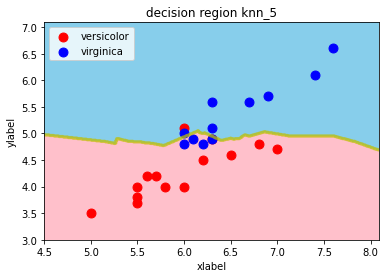

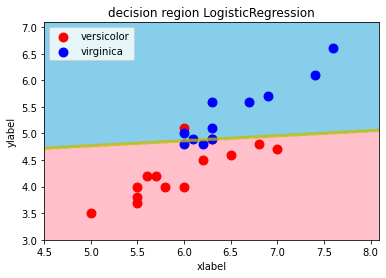

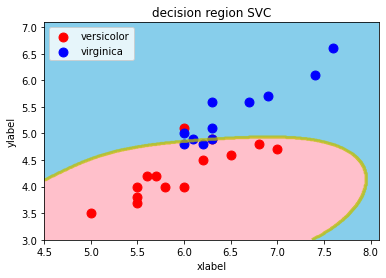

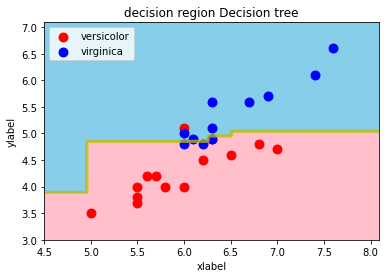

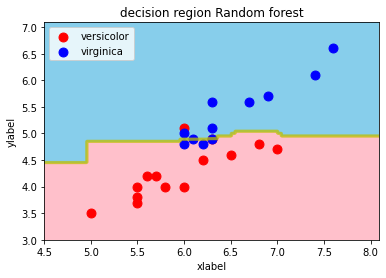

In [33]:
decision_region(X_test, y_test, knn_5, title='decision region knn_5')

decision_region(X_test, y_test, lr,title='decision region LogisticRegression')

decision_region(X_test, y_test, clf ,title='decision region SVC')

decision_region(X_test, y_test, dtc ,title='decision region Decision tree')

decision_region(X_test, y_test, rfc,title='decision region Random forest')


<hr>

**[Problem 10] (Advance task) Highly accurate method using all objective variables**

<hr>

In [35]:
def decision_region_ulti_valued(X, y, model, step=0.01, title='decision region', xlabel='sepal_length', ylabel='petal_length', target_names=['versicolor', 'virginica','setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

In [47]:
d = load_iris()

x = pd.DataFrame(data = d['data'],columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

y = pd.DataFrame(data = d['target'],columns=['Species'])

df = pd.concat([x, y], axis=1)

df = df.loc[: , ["sepal_length" , "petal_length" , "Species"]]

X = df.iloc[: , [0,1]].values
y = df.iloc[: , 2].values

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.25, random_state=42)

X_train_trans = StandardScaler().fit_transform(X_train)

X_test_trans = StandardScaler().fit_transform(X_test)

k_neigh_5_2 = KNeighborsClassifier(n_neighbors=5)
k_neigh_5_2.fit(X_train_trans, y_train)
pred_5_2 = k_neigh_5_2.predict(X_test_trans)

lr = LogisticRegression().fit(X_train_trans, y_train)
prediction_lr = lr.predict(X_test_trans)

clf = make_pipeline(StandardScaler(), SVC(gamma='auto')).fit(X_train_trans, y_train)
prediction_svc = clf.predict(X_test_trans)

dtc = DecisionTreeClassifier(random_state=0).fit(X_train_trans, y_train)
prediction_dtc = dtc.predict(X_test_trans)

rfc = RandomForestClassifier().fit(X_train_trans, y_train)
prediction_rfc = rfc.predict(X_test_trans)



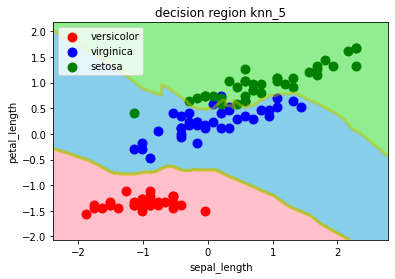

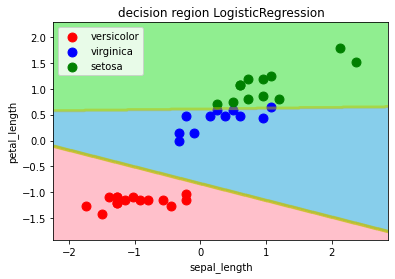

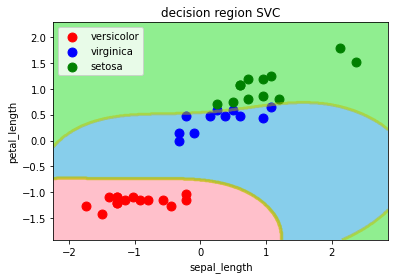

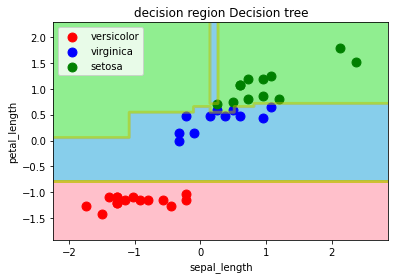

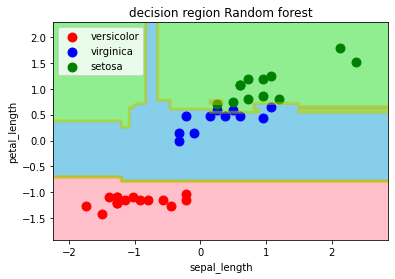

In [48]:
decision_region_ulti_valued(X_train_trans, y_train, k_neigh_5_2, title='decision region knn_5')

decision_region_ulti_valued(X_test_trans, y_test, lr,title='decision region LogisticRegression')

decision_region_ulti_valued(X_test_trans, y_test, clf ,title='decision region SVC')

decision_region_ulti_valued(X_test_trans, y_test, dtc ,title='decision region Decision tree')

decision_region_ulti_valued(X_test_trans, y_test, rfc,title='decision region Random forest')